In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc
import glob
import os
from matplotlib.gridspec import GridSpec

In [11]:
#dark file in date directory
directory = 'data/2023.03.27'
dark_file = pd.read_excel(glob.glob(directory+'/exp2/*.xlsx')[0])
dark = dark_file.iloc[5:,1].to_numpy()
wavelengths = dark_file.iloc[5:,0].to_numpy() 

#all other files within subfolders
files = glob.glob(directory+'/exp2/*/*.xlsx', recursive=True)
repeats = 5 #how many measurements of each do we have?

In [12]:
#take conc from filenames
C_name = []
C_avg = []
for f in files:
    name = os.path.basename(f)
    name = os.path.splitext(name)[0]
    C_avg.append(float(name))
    C_name.append(name + ' g/L')

#reorder names and conc in ascending order
files = [x for _, x in sorted(zip(C_avg,files))]
C_name = [x for _, x in sorted(zip(C_avg,C_name))]
C_avg = sorted(C_avg)
C_all = np.repeat(C_avg,repeats) #because we have 5 samples of each

In [13]:
#make a list of all the np arrays
spectras_list = []
spectras_avg_list = []
for fn in files:
    df = pd.read_excel(fn)
    s = df.iloc[5:,1:repeats+1].to_numpy() #first 10 readings
    spectras_list.append(s) #list of np arrays
    s_avg = np.average(s,1) #average of the 10 readings
    spectras_avg_list.append(s_avg)

all_spec = np.concatenate(spectras_list,1)
avg_spec = np.array(spectras_avg_list).T


In [14]:
#remove dark
# all_spec = (all_spec - dark[:,None])
# avg_spec = (avg_spec - dark[:,None])

#  normalise
clean_max = np.max(all_spec)
all_spec_norm = np.divide(all_spec,clean_max)
clean_max = np.max(avg_spec)
avg_spec_norm = np.divide(avg_spec,clean_max)


In [15]:
#work out intensity
I_all = []
for spec in spectras_list:
    # spec = spec - dark[:,None]
    for i in range(spec.shape[-1]):
        I_skl = auc(wavelengths,spec[:,i])
        I_all.append(I_skl)
I_all = np.array(I_all)

T = np.divide(I_all, np.nanmax(I_all))*100 #percentage transmission
A = 2 - np.log10(np.abs(T)) #absorbance


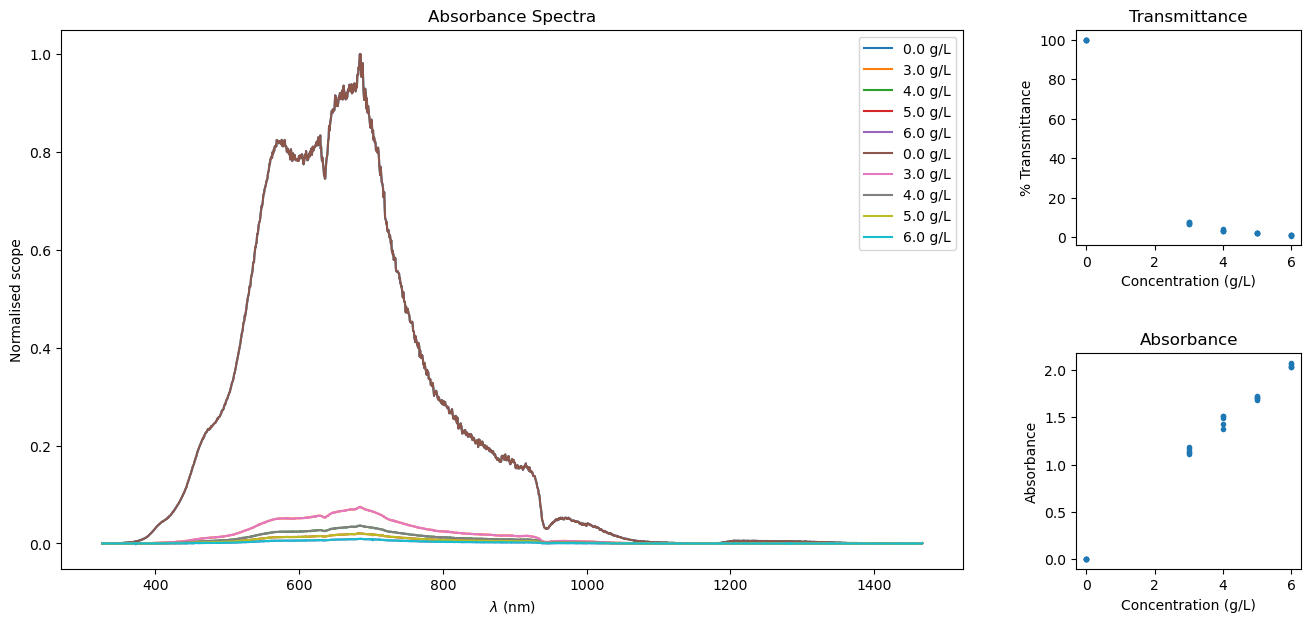

In [16]:

#plotting
fig1 = plt.figure(figsize=[16,7])
G = fig1.add_gridspec(2, 4, hspace=0.5, wspace = 0.5)
ax1 = plt.subplot(G[:,0:3])
ax2 = plt.subplot(G[0,3])
ax3 = plt.subplot(G[1,3])

ax1.plot(wavelengths, avg_spec_norm, label = C_name)
ax1.plot(wavelengths, avg_spec_norm, label = C_name)
ax1.set_title('Absorbance Spectra')
ax1.set_ylabel('Normalised scope')
ax1.set_xlabel('$\lambda$ (nm)')
ax1.legend()

ax2.plot(C_all, T,'.')
ax2.set_title('Transmittance')
ax2.set_ylabel('% Transmittance')
ax2.set_xlabel('Concentration (g/L)')

ax3.plot(C_all, A,'.')
ax3.set_title('Absorbance')
ax3.set_ylabel('Absorbance')
ax3.set_xlabel('Concentration (g/L)')

# plt.tight_layout(pad=1.1)
plt.show()


In [ ]:
# Saving results if you want to

# results = pd.DataFrame({'C (g/L)':C_all, 'I':I_all})
# results.to_csv('data/results/2023_03_27_I_exp3.csv', index=False)